# 1. 머신러닝을 위한 선형 대수학

---

## 학습 목표
- 행렬과 벡터를 다루는 선형 대수학의 개념을 학습합니다.
- 학습한 수학 공식들을 코드로 계산하는 방법을 학습합니다.

---

## 목차

### 3. 벡터 공간과 차원
1. 기저와 벡터 공간
2. 랭크와 차원

### 4. 선형 변환과 고유값
1. 선형 변환 
2. 고유값, 고유벡터

### 5. 행렬 분해
1. 고유 분해
2. 특이값 분해

---

## 3. 벡터 공간과 차원

머신러닝만 수행 하는데 있어서 모르고도 코드를 구현하는데 큰 문제가 생기지 않을 수 있는 개념이지만, 행렬의 차원에 대한 개념이 확실히 잡힌 사람일수록 데이터를 보는 시각이 달라집니다.

또한 뒤에 이어지는 고유값, 행렬 분해에 대한 학습을 위해서는 필수로 알야아 하는 개념입니다.

아래 이어지는 설명은 정말 핵심적인 개념을 나열하기에 한번도 rank와 차원에 대해서 공부한적이 없다면, 시간을 가지고 반복하여 학습해보도록 합시다.

### 3-1. 기저와 벡터 공간

기저와 벡터 공간의 정의만 보고 이해를 하기는 쉽지 않기에 예를 들어 설명해 보겠습니다.

여러분이 살고 있는 주소는 어떻게 표현하나요? 

서울에 살고 있는 엘리스 토끼의 주소는 서울특별시 서초구 우면동입니다.

주소를 표현하는 방식은 OO시 OO구 OO동으로 OO에 해당되는 곳을 넣어서 표현합니다. 

만약 주소를 쓰는란에 서초시 서울특별구 우면동이라고 쓴다면 어떨까요?

사람이라면 대충 알아들을 수 있겠지만 컴퓨터는 해당 주소를 찾지 못하고 에러를 출력할 것입니다.

주소를 표현하는 방식은 기저와 차원을 설명하기 매우 좋은 예입니다.

위 표현에서 기저가 의미하는 것은 시, 구, 동입니다.

부산특별시, 서울특별시 등 시는 시에 붙을 수 있는 장소들이 있고 구는 구에 맞는 장소들이 있습니다.

이렇게 고유의 단위로 표현되는 기준을 **기저**라고 합니다.

기저는 수학적으로는 벡터로 표현되며 가장 대표적으로 2차원 평면의 x축과 y축을 기저라고 할 수 있습니다.

2차원 공간 상의 모든 점들은 ($x축\;방향의\;크기*[1,0]+y축\;방향의\;크기*[0,1]$)으로 표현 가능합니다.

아래 예를 보며 이해해봅시다.

##### <예제 1> 2차원에서 기저를 사용한 벡터 표현

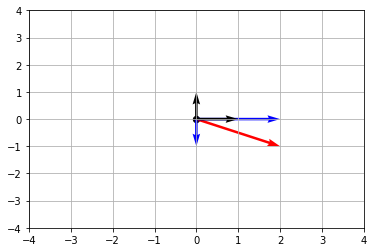

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# x_axis : x축 방향의 기저
x_axis = np.array([1,0])
# y_axis : y축 방향의 기저
y_axis = np.array([0,1])

# x축 방향으로 2만큼
A_x_scale = 2
# y축 방향으로 -1만큼
A_y_scale = -1

# A 벡터를 기저로 표현
A = A_x_scale*x_axis + A_y_scale*y_axis

# 원점
plt.scatter([0],[0], s=40, c='k')

origin = [0], [0] # 원점

# A 벡터
plt.quiver(*origin, [A[0]], [A[1]], color=['r'], angles='xy', scale_units='xy',scale=1)

# A_x_scale*x_axis 벡터, A_y_scale*y_axis 벡터
plt.quiver(*origin, [A_x_scale*x_axis[0], A_y_scale*y_axis[0]], [A_x_scale*x_axis[1], A_y_scale*y_axis[1]], color=['b'], angles='xy', scale_units='xy',scale=1)

# x_axis 벡터, y_axis 벡터
plt.quiver(*origin, [x_axis[0], y_axis[0]], [x_axis[1], y_axis[1]], color=['k'], angles='xy', scale_units='xy',scale=1)

plt.axis([-4,4,-4,4])
plt.grid(True)
plt.show()

#### Vector spaces

그렇다면 벡터 공간은 무엇을 의미할까요?

**벡터 공간(Vector Spaces)**은 어떤 벡터 집합이 있을때, 그 벡터들 선형 결합으로 구성할 수 있는 벡터들의 집합을 의미합니다.

위 정의를 이해하기 위해서 **선형 결합(linear combination)**에 대해서 알아봅시다.

선형 결합이란 벡터들을 스칼라 곱과 벡터의 덧셈을 조합하여 새로운 벡터를 얻는 연산입니다. 

예를 들어, 두 개의 벡터 $\vec{a}=[1, 0, 2]^{T},\;\; \vec{b}=[0, -1, -1]^{T}$가 존재한다면, 다음 벡터들은 모두 벡터 $\vec{a}, \vec{b}$의 선형 결합입니다.

##### 선형 결합 예

> $$\vec{a}+\vec{b}=[1, -1, 1]^{T}$$

> $$2\vec{a}=[2, 0, 4]^{T}$$

> $$-\vec{b}=[0, 1, 1]^{T}$$

> $$2\vec{a}-3\vec{b}=[2, 3, 7]^{T}$$

선형 결합은 2개 이상의 벡터에 대해서도 정의할 수 있습니다.

만약, $n$개의 벡터 $\vec{a_1}, \vec{a_2}, \vec{a_3},...,\vec{a_n}$에 대해서 선형 결합을 표현하면 다음과 같습니다.

##### 선형 결합

> $$c_1 \vec{a_1} + c_2 \vec{a_2} + c_3 \vec{a_3} + ... + c_n \vec{a_n},\;\;$$ $c_i$는 임의의 실수

선형 결합에 대해서 알았으니, 위 벡터 $\vec{a}, \vec{b}$의 선형 결합으로 만들 수 있는 모든 벡터들을 모아서 집합 $V$를 만들면 다음과 같습니다.

##### 선형 결합으로 이루어진 벡터 집합

> $$V: \{\vec{a},\;\; \vec{b},\;\; \vec{a}+\vec{b},\;\; 2\vec{a}+\vec{b},\;\; ...\}$$

선형 결합으로 만들 수 있는 조합은 무한개이기에 위와 같이 무한 집합 형태로 나타낼 수 있습니다.

이렇게 만들어진 집합 $V$는 벡터 $\vec{a}, \;\vec{b}$의 **벡터 공간**이라합니다.

벡터 공간에서 한 가지 더 집고 가야할 개념으로 **span**이 있습니다.

위에서 정의 했던 집합 $V$를 만든 과정과 같이 벡터 간의 덧셈으로 벡터 공간의 벡터들을 만드는 행위를 `벡터들로 공간을 span한다` 라고 표현합니다.

벡터 하나에 대해서도 span은 가능하며 만약 위의 $\vec{a}$로 span한다면 그 벡터 공간의 벡터들은 다음과 같습니다.

##### a 벡터로 span한 벡터 공간의 벡터들

> $$\vec{a}, \; 2\vec{a}, \; 3\vec{a}, \; -\vec{a}, \; 0.2\vec{a}, \; ...$$

만약 $2\vec{a}=\vec{c}$라 가정하고, $\vec{a}, \vec{b}$로 span한 벡터 공간 $V_{1}$과 $\vec{c}, \vec{b}$로 span한 벡터 공간 $V_{2}$를 정의해 봅시다.

##### 2가지 벡터 공간 

> $$V_{1}: \{\vec{a},\;\; \vec{b},\;\; \vec{a}+\vec{b},\;\; 2\vec{a}+\vec{b},\;\; ...\}$$

> $$V_{2}: \{\vec{c},\;\; \vec{b},\;\; \vec{c}+\vec{b},\;\; 2\vec{c}+\vec{b},\;\; ...\}$$

두 집합은 서로 달라보이지만 사실은 같은 집합입니다.

예를 들어, $V_{2}$에 속하는 벡터 $\vec{c} + \vec{b}$은 $V_{1}$에 있는 $2\vec{a} + \vec{b}$으로 대응 가능합니다.

같은 방식으로 $\vec{c}$에 곱해지는 수의 2배를 $\vec{a}$에 곱하는 것으로 $V_{2}$에 있는 벡터들은 $V_{1}$의 벡터들로 표현이 가능합니다.

#### 선형 독립

벡터 공간에 대해서 알아봤으니, 기저에 대해서 정의를 내리기 위해서 선형 독립(linear independent)에 대해서 알아봅시다.

선형 독립이란 벡터 $\vec{a_1}, \vec{a_2}, \vec{a_3},...,\vec{a_n}$이 있을 때, 만약 모든 계수 $(c_1,c_2,c_3,...,c_n)$ 가 0인 경우를 제외하고 어떠한 선형 결합으로도 0을 만들 수 없는 것을 의미합니다.

##### 선형 독립 조건

> $$c_1 \vec{a_1} + c_2 \vec{a_2} + c_3 \vec{a_3} + ... + c_n \vec{a_n} \neq 0, \;\;except \; for \; all \; c_i=0$$

예를 들어, $\vec{a_1}=[2,0,1]^{T},\; \vec{a_2}=[0,-1,0]^{T}, \; \vec{a_2}=[-2,-1,-1]^{T}$ 벡터들이 선형 독립을 이루는지 알아봅시다.

$c_1=1, \; c_2=-1, \; c_3=1$로 설정하면 선형 결합 값은 $[2,0,1]^{T}-[0,-1,0]^{T}+[-2,-1,-1]^{T}=[0,0,0]^{T}=0$ 가 됩니다.

위 결과를 보면 알 수 있듯이, $\vec{a_1}, \vec{a_2}, \vec{a_3}$ 은 선형 독립이 아닙니다. 

#### 기저

선형 독립에 대해서 알았으니 이제 기저의 정의를 알아봅시다.

**기저(basis)**는 벡터 공간을 만드는 벡터들이 선형 독립을 만족하는 경우에 그 벡터들을 기저라고 합니다.

가장 쉬운 기저의 예로 $b_1=[1,0]^{T}, \; b_2=[0,1]^{T}$을 들을 수 있습니다.

벡터 $b_1, \; b_2$은 선형 독립이며, 선형 결합을 통하여 2차원 상에 존재하는 모든 벡터들을 나타낼 수 있습니다.

그렇다면 $c_1=[1,1]^{T}, \; c_2=[0,-1]^{T}$ 벡터의 경우는 어떨까요?

$c_1, \; c_2$ 벡터 또한 선형 독립이며, 선형 결합을 통하여 2차원 상에 존재하는 모든 벡터들을 나타낼 수 있습니다.

이처럼 같은 벡터 공간에서는 여러가지 기저가 존재할 수 있습니다.

#### Null spaces

앞서 배운 벡터 공간과 기저에 대한 지식을 바탕으로 행렬의 특성을 파악할 수 있는 특수한 벡터 공간들에 대해서 학습해봅시다.

벡터 공간 중 특수한 벡터 공간으로 영 공간(Null spaces)이 있습니다.

**행렬 A의 null spaces**는 행렬 A에 대해서 $Ax = 0$ 을 만족시키는 모든 벡터 $x$를 의미합니다.

수식과 정의만을 통해서는 이해가 어려울 수 있으니 아래 예시 코딩을 통해 살펴보도록 하겠습니다.

##### <예제 2> null spaces

In [34]:
A = np.array([[2,1,-1],[4,2,-2],[6,3,-3]])

print("A: \n{}\n".format(A))

x_1 = np.array([0,0,0]).reshape(-1,1) 
x_2 = np.array([1,1,1]).reshape(-1,1)
x_3 = np.array([-1,2,0]).reshape(-1,1)
x_4 = np.array([1,0,2]).reshape(-1,1)

print("Ax_1 : \n{}\n".format(np.dot(A,x_1)))
print("Ax_2 : \n{}\n".format(np.dot(A,x_2)))
print("Ax_3 : \n{}\n".format(np.dot(A,x_3)))
print("Ax_4 : \n{}\n".format(np.dot(A,x_4)))

A: 
[[ 2  1 -1]
 [ 4  2 -2]
 [ 6  3 -3]]

Ax_1 : 
[[0]
 [0]
 [0]]

Ax_2 : 
[[2]
 [4]
 [6]]

Ax_3 : 
[[0]
 [0]
 [0]]

Ax_4 : 
[[0]
 [0]
 [0]]



$Ax$가 0을 출력하는지를 확인하여 `x_2`를 제외하고 `x_1,x_3,x_4` 모두 영 공간에 있음을 확인 했습니다.

`x_1,x_3,x_4` 이외의 또 다른 영 공간 존재하는 벡터가 있을까요?

`x_3`에 아무 숫자를 곱하여 `x_5`벡터를 만들고 결과를 확인해 봅시다.

In [35]:
x_5 = 2*x_3

print("Ax_5 : \n{}\n".format(np.dot(A,x_5)))

Ax_5 : 
[[0]
 [0]
 [0]]



같은 방식으로 `x_4`에 아무 숫자를 곱하여 `x_6`벡터를 만들고 결과를 확인해 봅시다.

In [36]:
x_6 = -12*x_4

print("Ax_6 : \n{}\n".format(np.dot(A,x_6)))

Ax_6 : 
[[0]
 [0]
 [0]]



`x_3`를 가지고 `x_5`벡터와 같이 `x_3`로 만든 벡터 공간의 수많은 종류의 만들 수 있고, `x_4`도 마찬가지로 `x_6`와 같이 만들 수 있습니다.

하지만 `x_3`를 가지고 `x_6` 벡터들을 만들 수 없고, `x_4`를 가지고 `x_5` 벡터들을 만들 수 없습니다.

In [37]:
-12*x_3 == x_6

array([[False],
       [False],
       [False]])

따라서 `x_3, x_4`는 선형 독립 관계에 있고, 결과적으로 null spaces의 기저라고 할 수 있습니다.

`A`에 대한 null spaces에 속하는 벡터들은 $x_3, x_4$ 기저를 사용하여 아래와 같이 표현할 수 있습니다.

##### null spaces of x_3, x_4

> $$c_1 x_3+c_2 x_4\;\;$$   ($c_1,c_2$는 임의의 실수 값)

위 수식을 사용해서 `x_7`을 만들어보고 $Ax=0$을 만족하는지 확인해봅시다.

In [38]:
x_7 = 5*x_3 + (-2)*x_4

print("Ax_7 : \n{}\n".format(np.dot(A,x_7)))

Ax_7 : 
[[0]
 [0]
 [0]]



#### Column spaces

행렬 A는 null spaces뿐만 아니라 column spaces라는 중요한 공간을 갖습니다. 

**column spaces**: 행렬의 column 벡터들로 만든 벡터 공간을 의미합니다.

아래 예제를 보며 column spaces에 대해서 이해해봅시다.

##### <예제 3> column spaces

위 예에서 사용된 행렬 A의 column들을 나열하면 아래와 같습니다.

In [41]:
print("A: \n{}\n".format(A))

print("1st column: \n{}\n".format(A[:,0].reshape(-1,1)))
print("2nd column: \n{}\n".format(A[:,1].reshape(-1,1)))
print("3rd column: \n{}\n".format(A[:,2].reshape(-1,1)))

A: 
[[ 2  1 -1]
 [ 4  2 -2]
 [ 6  3 -3]]

1st column: 
[[2]
 [4]
 [6]]

2nd column: 
[[1]
 [2]
 [3]]

3rd column: 
[[-1]
 [-2]
 [-3]]



재밌게도 1st column 벡터는 2nd 의 2배로 구할 수 있습니다.

마찬가지로 3rd column 벡터는 2nd의 -1배로 구해집니다.

결국 행렬 A의 column 벡터들은 2nd column 벡터를 기저로 만든 벡터 공간입니다.

##### 행렬 A의 column spaces

> $$c*[1,2,3]^{T}\;\;$$ $c$는 임의의 실수

### 3-2. 랭크와 차원

#### 랭크와 차원 정의

랭크와 차원은 비슷한 정의를 갖고 있습니다. 아래 정의를 확인해 봅시다.

- **차원(dimension)**: 어떠한 벡터 공간을 이루는 기저의 개수
- **랭크(rank)**: 크기가 (m,n) 행렬 A가 주어졌을 때, 그 행렬의 column spaces의 기저의 개수를 랭크 개수

A에 대한 랭크는 $rank(A)=r \;$ (r은 0보다 크고 n이하인 자연수)로 표현합니다.

위 정의를 정리하자면 랭크는 특정 행렬에 대한 column spaces의 차원입니다.

앞선 column spaces 예에서 정의된 행렬 A의 경우 기저가 하나였기에 랭크는 1개라고 할 수 있습니다.

랭크가 1인 행렬은 어떤 정보를 갖는지 아래 예를 보며 살펴 봅시다.

##### <예제 4> 랭크와 차원

엘리스 토끼가 주 마다 쇼핑한 `라면`, `계란`, `물 1L`의 개수에 대한 데이터 입니다.

In [48]:
from pandas import DataFrame

raw_data = {'라면': [6, 4, 4, 8],
            '계란': [12, 8, 8, 16],
            '물 1L': [3, 2, 2, 4]}
data = DataFrame(raw_data, index=[1,2,3,4])
data

,라면,계란,물 1L
1,6,12,3
2,4,8,2
3,4,8,2
4,8,16,4


column spaces 관점에서 `물` column을 기저라 생각한다면 아래와 같이 표현할 수 있습니다.

In [49]:
from pandas import DataFrame

raw_data = {'2*물': [6, 4, 4, 8],
            '4*물': [12, 8, 8, 16],
            '물': [3, 2, 2, 4]}
data = DataFrame(raw_data, index=[1,2,3,4])
data

,2*물,4*물,물
1,6,12,3
2,4,8,2
3,4,8,2
4,8,16,4


결국 1,2,3,4 주에 구매한 `물`에 대한 정보만 알수 있다면 나머지 품목에 대한 정보는 `물`에 대한 정보로도 표현이 가능하게 됩니다.

따라서 `라면`, `계란`은 `물`의 2배 4배일뿐 추가적인 정보를 제공하지는 않습니다.

결국 데이터의 차원이라는 것은 이 데이터가 가지고 있는 정보량을 표현한다고 할 수 있겠습니다.

랭크와 차원을 사용한 더 여러가지 활용법이 있지만 머신러닝 기법을 학습할 때, 다시 설명을 하도록 하겠습니다.

#### 랭크와 벡터 공간

(m,n) 크기를 갖는 영 행렬이 아닌 행렬 A의 랭크는 다음과 같은 방정식을 만족합니다.

##### 랭크와 null spaces 관계

> $$n = rank(A) + null(A)$$

$rank(A)$은 행렬 $A$에 대한 랭크 값, $null(A)$은 행렬 $A$에 대한 null spaces의 차원 개수를 의미합니다. 

$rank(A)$의 최소 값은 1이며,(1개의 기저는 항상 존재) 최대 값은 column의 개수인 n입니다.

$rank(A)=n$ 인 경우, $null(A)=0$ 입니다. 이것은 null spaces 만들 수 있는 기저가 하나도 없다는 의미입니다. 

이러한 null spaces는 영벡터만 존재하며, 영벡터는 기저가 될 수 없습니다.

아래 예를 수행해 보면서 코딩으로 랭크 값과 null spaces를 어떻게 구하는지 알아봅시다.

##### <예제 5> 행렬의 랭크와 null spaces

`numpy.linalg.matrix_rank(A)`: 행렬 A의 랭크 값을 출력.

`scipy.linalg.null_space(A)`: 행렬 A의 null spaces에 해당되는 기저 column 벡터를 출력. 해당 벡터는 크기가 1로 normalization 됨.

In [1]:
import numpy as np
from scipy.linalg import null_space

# A 초기화
A = np.array([[2,1,-1],[4,2,-2],[6,3,-3]])

# numpy.linalg.matrix_rank 함수를 사용하여 A의 랭크 값 출력
rank_A = np.linalg.matrix_rank(A)

print("행렬 A의 rank 값: {}".format(rank_A))

# scipy.linalg.null_space함수를 사용하여 A의 Null space 벡터를 계산 
ns = null_space(A)

print("행렬 A의 null space 벡터: \n{}\n".format(ns))

# 첫 번째 null space 벡터와 A와의 행렬곱
print("Ax_1: \n{}\n".format(np.dot(A,ns[:,0])))

# 두 번째 null space 벡터와 A와의 행렬곱
print("Ax_2: \n{}\n".format(np.dot(A,ns[:,1])))

행렬 A의 rank 값: 1
행렬 A의 null space 벡터: 
[[ 0.57735027  0.        ]
 [-0.57735027  0.70710678]
 [ 0.57735027  0.70710678]]

Ax_1: 
[-2.22044605e-16 -4.44089210e-16 -8.88178420e-16]

Ax_2: 
[0. 0. 0.]



In [2]:
import numpy as np
from scipy.linalg import null_space

A = np.array([[1, 2, 3], [4, 5, 6]])

rank_A = np.linalg.matrix_rank(A)
ns = null_space(A)

N = rank_A + ns.shape[1]

print(N)

3


--- 